In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import xlrd

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来显示正负号

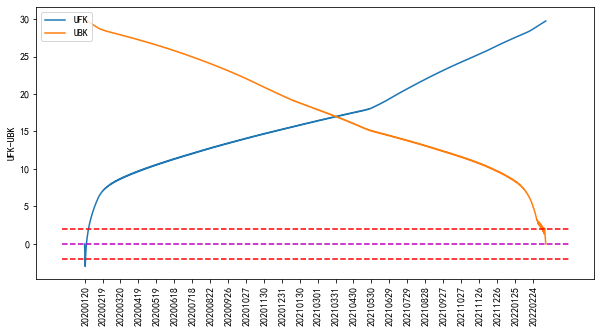

[20210401, 20210402, 20210403]


In [17]:
book= xlrd.open_workbook("C:/Users/86157/Desktop/112.xls")
sheet=book.sheet_by_index(0)
col_date=list(map(int,sheet.col_values(0)))
col_data=list(map(int,sheet.col_values(2)))
s=0
Sk=[0]
UFk=[0]
E=[0]
Var=[0]
n=len(col_data)
for i in range(1,n):
    for j in range(i):
        if col_data[i] > col_data[j]:
                s =s+1
        else:
                s=s+0
    Sk.append(s)
    E.append((i+1)*(i+2)/4)
    Var.append((i+1)*i*(2*(i+1)+5)/72)
    UFk.append((Sk[i]-E[i])/np.sqrt(Var[i]))
        
col_reverse_data=col_data[::-1]
s2=0
Sk2=[0]
UBk=[0]
UBk2=[0]
E2=[0]
Var2=[0]
for i in range(1,n):
        for j in range(i):
            if col_reverse_data[i] > col_reverse_data[j]:
                s2 =s2+1
            else:
                s2=s2+0
        Sk2.append(s2)
        E2.append((i+1)*(i+2)/4)
        Var2.append((i+1)*i*(2*(i+1)+5)/72)
        UBk.append((Sk2[i]-E2[i])/np.sqrt(Var2[i]))
        UBk2.append(-UBk[i])
UBkT=UBk2[::-1]
diff= np.array(UFk)-np.array(UBkT)
K=list()
for k in range(1,n):
        if diff[k-1]*diff[k]<0:
            K.append(col_date[k])
#     print(UFk)
#     print(UBkT)
plt.figure(figsize=(10,5))
plt.plot(range(n),UFk,label=str("UFK"))
plt.plot(range(n),UBkT,label=str("UBK"))
x=list(range(n))
plt.xticks(x[::30],col_date[::30],rotation=90)
plt.ylabel('UFK-UBK')
x_lim =plt.xlim()
plt.plot(x_lim,[-1.96,-1.96],'--',color='r')
plt.plot(x_lim,[0,0],'m--')
plt.plot(x_lim,[+1.96,+1.96],'--',color='r')
plt.legend(loc=2)
plt.show()
print(K)

In [15]:
book= xlrd.open_workbook(r"C:\Users\86157\Desktop\历史数据.xls")
sheet_names=book.sheet_names()
date_list=list(map(int,book.sheet_by_name("湖北省").col_values(0)[1::]))
data=[]
for i in range(len(date_list)):
    data.append(0)
dic=dict(zip(date_list,data))
for name in sheet_names:
    sheet=book.sheet_by_name(name)
    col_date=list(map(int,sheet.col_values(0)[1::]))
    col_data=list(map(int,sheet.col_values(1)[1::]))
    dic_col=dict(zip(col_date,col_data))
    for i in date_list:
        for j in col_date:
            if(j==i):
                dic[i]=dic[i]+dic_col[j]
print(dic)

{20200120: 293, 20200121: 435, 20200122: 564, 20200123: 861, 20200124: 1325, 20200125: 2005, 20200126: 2773, 20200127: 4513, 20200128: 5987, 20200129: 7713, 20200130: 9686, 20200131: 11790, 20200201: 14377, 20200202: 17205, 20200203: 20435, 20200204: 24324, 20200205: 28026, 20200206: 31159, 20200207: 34560, 20200208: 37197, 20200209: 40158, 20200210: 42637, 20200211: 44653, 20200212: 59800, 20200213: 63852, 20200214: 66490, 20200215: 68496, 20200216: 70545, 20200217: 72436, 20200218: 74183, 20200219: 74573, 20200220: 75465, 20200221: 76288, 20200222: 76936, 20200223: 77150, 20200224: 77658, 20200225: 78064, 20200226: 78497, 20200227: 78824, 20200228: 79250, 20200229: 79824, 20200301: 80026, 20200302: 80151, 20200303: 80270, 20200304: 80409, 20200305: 80552, 20200306: 80651, 20200307: 80695, 20200308: 80735, 20200309: 80754, 20200310: 80778, 20200311: 80793, 20200312: 80801, 20200313: 80824, 20200314: 80844, 20200315: 80860, 20200316: 80881, 20200317: 80894, 20200318: 80928, 20200319: 8

In [16]:
import openpyxl
f=openpyxl.Workbook()
sheet=f.create_sheet()
count=0
for key,value in dic.items():
    count=count+1
    sheet.cell(row=count,column=1).value=key
    sheet.cell(row=count,column=2).value=value
f.save(r"C:\Users\86157\Desktop\sum.xls")            